In [1]:
import os

import gym
import gym_novel_gridworlds
import numpy as np
import matplotlib.pyplot as plt

from stable_baselines import DDPG
from stable_baselines.ddpg.policies import LnMlpPolicy
from stable_baselines import results_plotter
from stable_baselines.bench import Monitor
from stable_baselines.results_plotter import load_results, ts2xy
from stable_baselines.common.noise import AdaptiveParamNoiseSpec
from stable_baselines.common.callbacks import BaseCallback

c:\anaconda3\envs\py3_7_sb\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\anaconda3\envs\py3_7_sb\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\anaconda3\envs\py3_7_sb\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\anaconda3\envs\py3_7_sb\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarnin

In [2]:
class SaveOnBestTrainingRewardCallback(BaseCallback):
    """
    Callback for saving a model (the check is done every ``check_freq`` steps)
    based on the training reward (in practice, we recommend using ``EvalCallback``).

    :param check_freq: (int)
    :param log_dir: (str) Path to the folder where the model will be saved.
      It must contains the file created by the ``Monitor`` wrapper.
    :param verbose: (int)
    """

    def __init__(self, check_freq: int, log_dir: str, verbose=1):
        super(SaveOnBestTrainingRewardCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.log_dir = log_dir
        self.save_path = os.path.join(log_dir, 'best_model')
        self.best_mean_reward = -np.inf

    def _init_callback(self) -> None:
        # Create folder if needed
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self) -> bool:
        if self.n_calls % self.check_freq == 0:

            # Retrieve training reward
            x, y = ts2xy(load_results(self.log_dir), 'timesteps')
            if len(x) > 0:
                # Mean training reward over the last 100 episodes
                mean_reward = np.mean(y[-100:])
                if self.verbose > 0:
                    print("Num timesteps: {}".format(self.num_timesteps))
                    print(
                        "Best mean reward: {:.2f} - Last mean reward per episode: {:.2f}".format(self.best_mean_reward,
                                                                                                 mean_reward))

                # New best model, you could save the agent here
                if mean_reward > self.best_mean_reward:
                    self.best_mean_reward = mean_reward
                    # Example for saving best model
                    if self.verbose > 0:
                        print("Saving new best model to {}".format(self.save_path))
                    self.model.save(self.save_path)

        return True





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Num timesteps: 1000
Best mean reward: -inf - Last mean reward per episode: -485.41
Saving new best model to tmp/best_model
Num timesteps: 2000
Best mean reward: -485.41 - Last mean reward per episode: -682.01
Num timesteps: 3000
Best mean reward: -485.41 - Last mean reward per episode: -633.07
Num timesteps: 4000
Best mean reward: -485.41 - Last mean reward per episode: -644.56
Num timesteps: 5000
Best mean reward: -485.41 - Last mean reward per episode: -665.29
Num timesteps: 6000
Best mean reward: -485.41 - Last mean reward per episode: -676.58
Num timesteps: 7000
Best mean reward: -485.41 - Last mean reward per episode: -678.79
Num timesteps: 8000
Best mean reward: -485.41 - Last mean reward per episode: -684.68
Num timesteps: 9000
Best mean reward: -485.41 - Last mean reward per episode: -678.55
Num timesteps: 10000
Best mean reward: -485.41 - Last mean reward per episode: -695.02


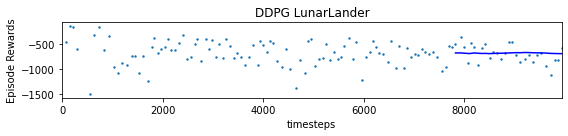

In [3]:
# Create log dir
log_dir = "tmp/"
os.makedirs(log_dir, exist_ok=True)

# Create and wrap the environment
# env_id = 'NovelGridworld-v0'
# env = gym.make(env_id)
env = gym.make('LunarLanderContinuous-v2')

# https://stable-baselines.readthedocs.io/en/master/common/monitor.html
env = Monitor(env, log_dir)

# Add some param noise for exploration
param_noise = AdaptiveParamNoiseSpec(initial_stddev=0.1, desired_action_stddev=0.1)
# Because we use parameter noise, we should use a MlpPolicy with layer normalization
model = DDPG(LnMlpPolicy, env, param_noise=param_noise, verbose=0)
# Create the callback: check every 1000 steps
callback = SaveOnBestTrainingRewardCallback(check_freq=1000, log_dir=log_dir)
# Train the agent
time_steps = 10000 #1e5
model.learn(total_timesteps=int(time_steps), callback=callback)

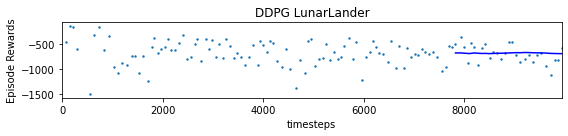

In [4]:
results_plotter.plot_results([log_dir], time_steps, results_plotter.X_TIMESTEPS, "DDPG LunarLander")
plt.show()

127 127


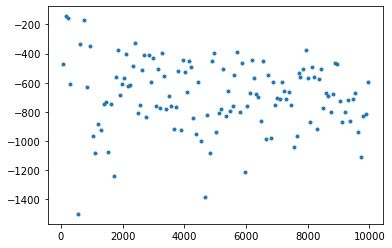

In [23]:
x, y = ts2xy(load_results(log_dir), 'timesteps')

print(len(x), len(y))

plt.plot(x, y, '.')
plt.show()

In [25]:
print(env.get_episode_rewards())
print(env.get_episode_lengths())

[-471.62964469528106, -143.50615241206538, -158.62510937905392, -608.9745496852865, -1501.665556372593, -333.21231031037433, -172.0625314272365, -632.0998544323069, -346.95897167988426, -963.5339962905448, -1084.0926144461873, -882.5009257308699, -928.442456757548, -743.8483664928307, -736.0686167642906, -1076.7282909052701, -746.9768066280171, -1242.7964566511798, -563.4204669842452, -375.58044200249094, -682.2946358906096, -609.1881854475464, -570.3731036914028, -401.9179522087585, -622.7453774963382, -613.7464338766879, -487.23105463482176, -330.38133129623145, -805.4309586086985, -756.7158477445823, -511.16664669448215, -411.84918697542054, -836.5785651467004, -408.8359379129773, -595.5132787786449, -433.76567476776245, -762.3346661304352, -502.57504972437954, -776.4472952395591, -397.00184352655566, -552.2910750963438, -783.2680668111922, -688.4767608009024, -762.6144329689391, -915.416258650517, -765.920471064736, -516.8632155368393, -924.7390388323828, -444.8523767552082, -524.6